In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [107]:
data = pd.read_csv("marketing_campaign.csv", sep='\t')

In [135]:
data.head(3)

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Spent,Relationship_Status,Children,Is_Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,0,0,1,1617,Alone,0,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,0,0,0,27,Alone,2,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,0,0,0,776,Not Alone,0,0


In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### HANDLING NULL VALUES

In [110]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [111]:
data = data.dropna()

### FEATURE ENGINEERING

In [112]:
data["Spent"] = data["MntWines"] + data["MntFruits"] + data["MntMeatProducts"] + data["MntFishProducts"] + data["MntSweetProducts"]+ data["MntGoldProds"]

data["Relationship_Status"] = data["Marital_Status"].replace({"Married":"Not Alone", "Together":"Not Alone", "Absurd":"Alone", 
                                                              "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone"})
data["Children"] = data["Kidhome"] + data["Teenhome"]
data["Is_Parent"] = np.where(data["Children"] > 0, 1, 0)
data["Education"] = data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", 
                                             "Master":"Postgraduate",  "PhD":"Postgraduate"})
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish",
                          "MntSweetProducts":"Sweets","MntGoldProds":"Gold"})


C:\Users\USER\AppData\Local\Temp\ipykernel_17756\56092761.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Spent"] = data["MntWines"] + data["MntFruits"] + data["MntMeatProducts"] + data["MntFishProducts"] + data["MntSweetProducts"]+ data["MntGoldProds"]
C:\Users\USER\AppData\Local\Temp\ipykernel_17756\56092761.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Relationship_Status"] = data["Marital_Status"].replace({"Married":"Not Alone", "Together":"Not Alone", "Absurd":"Alone",
C:\Users\US

In [113]:
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis = 1)

### CONFUSION MATRIX

<Axes: >

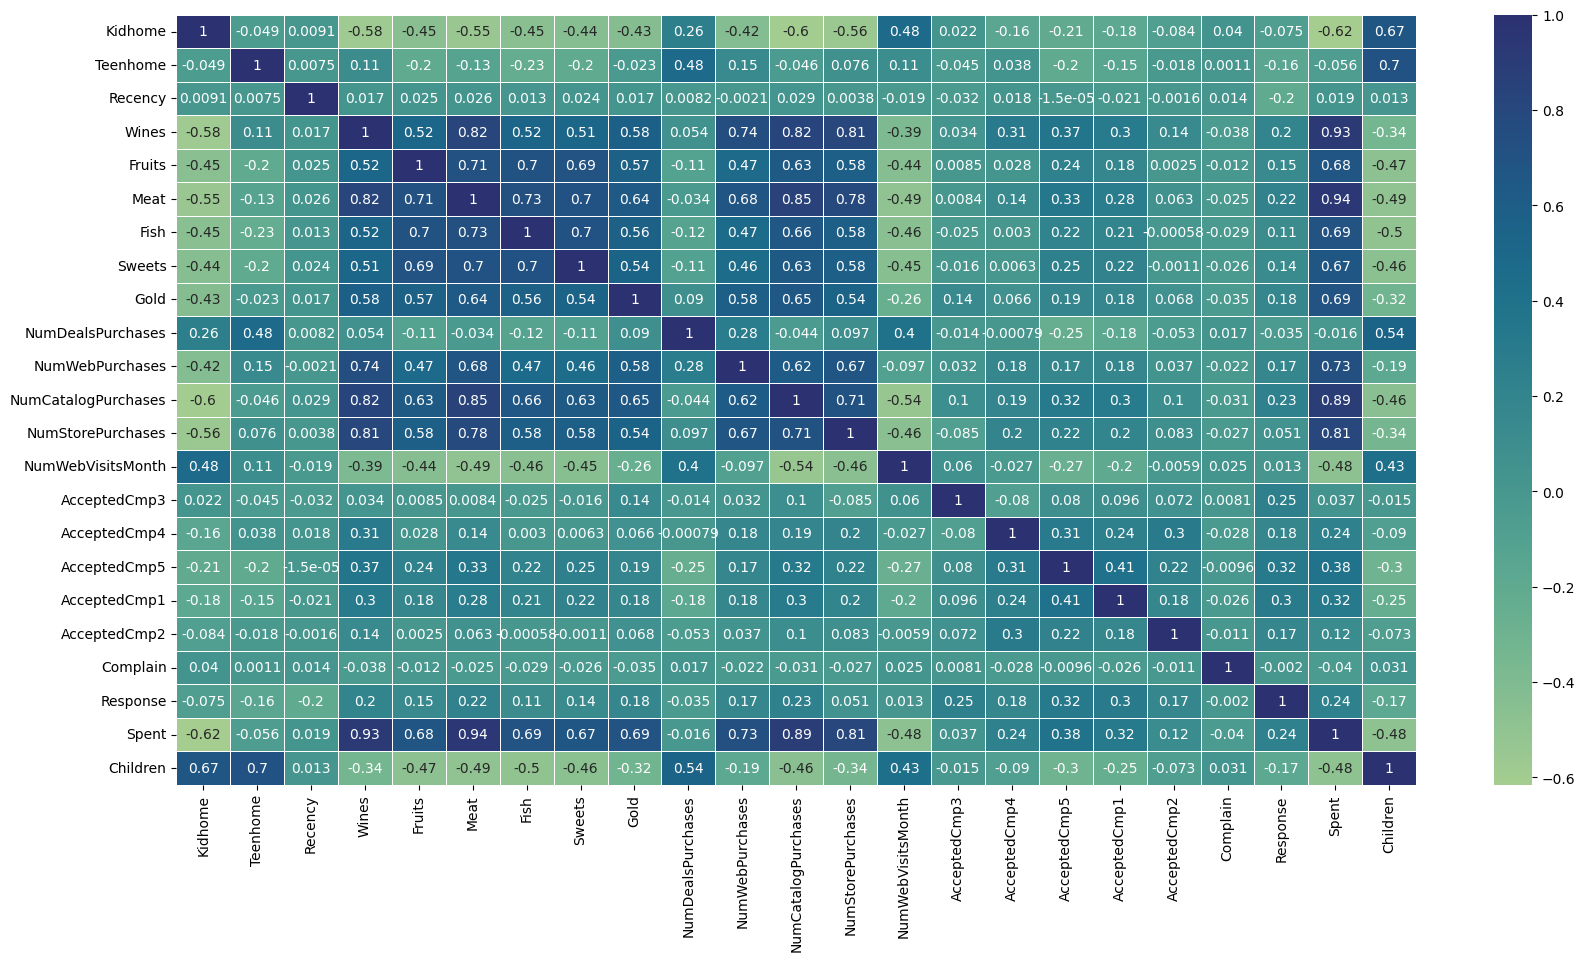

In [117]:
df = data.select_dtypes(include="int64")
matrix = df.corr(method="spearman")
# mask = np.triu(np.ones_like(matrix, dtype=bool))
plt.figure(figsize = (20, 10))
sns.heatmap(matrix, annot = True, linewidths=.5, cmap = "crest")

### ENCODING CATEGORICAL VARIABLES

In [140]:
encoder = LabelEncoder()
data["Education"] = encoder.fit_transform(data["Education"])
data["Relationship_Status"] = encoder.fit_transform(data["Relationship_Status"])

### SCALING FEATURES